In [ ]:
import os
import struct
import numpy as np
import matplotlib as mpl
import scipy as sp
import scipy.sparse
from matplotlib import pyplot

#Function to read from MNIST data
def read(dataset = "training", path = "."):
    if dataset is "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        _, _ = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        _, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    return (lbl, img)

#Function to display image
def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

In [1]:
#Reading Training Data and Test Data
[trainLabels,trainSet]=read(dataset = "training", path = ".")
[testLabels,testSet]=read(dataset = "testing", path = ".")

#Preprocessing Training Data and Test Data:
# 1- Changing shape of each sample data from 28*28 to 1*784
# 2- Dividing each pixel magnitude in sampe by 255
trainVec=np.zeros(shape=(len(trainSet),784),dtype=float)
testVec=np.zeros(shape=(len(testSet),784),dtype=float)

for i in range(len(trainSet)):
    trainVec[i]=np.reshape(trainSet[i]/255,(1,784))
for i in range(len(testSet)):
    testVec[i]=np.reshape(testSet[i]/255,(1,784))

In [ ]:
#Making a list of list of class labels of 100 closest samples from training set
#for each element in the test set in a sorted manner . The first element in the
#list for a given test sampe is the class label of the closestsample in the 
#training sample to it.

hundredClosestClasses=list()
k=100
for i in range(len(testLabels)):
    normDistances=np.linalg.norm(trainVec-testVec[i],axis=1)
    idx=np.argpartition(normDistances,k)
    sortedMinVals=np.argsort(normDistances[idx[:k]])
    hundredClosestClasses.append(trainLabels[idx[sortedMinVals]])

#Storing this data
#dill.dump_session('knn_class_labels.db')

In [3]:
#Loading data
#dill.load_session('knn_class_labels.db')

#Function that returns the mode of an array (term with highest frequency)
def mode(x):
    values, counts = np.unique(x, return_counts=True)
    m = counts.argmax()
    return values[m]

K=[1, 3, 5, 10, 30, 50, 70, 80, 90, 100]
Accuracy=list()
for k in K:
    count=0
    for i in range(len(testLabels)):
        predictedClass=mode(hundredClosestClasses[i][:k])
        if(predictedClass==testLabels[i]):
            count=count+1
    Accuracy.append(count/len(testLabels))


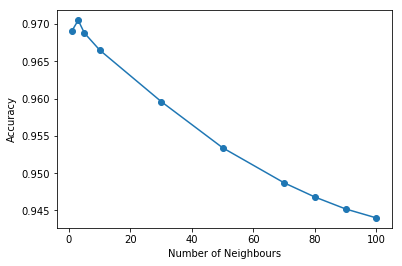

In [4]:
pyplot.plot(K,Accuracy,marker='o')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Number of Neighbours')
pyplot.savefig('knn_plot.png', bbox_inches='tight')

In [6]:
print("K \t Accuracy")
for k in range(len(K)):
    print(str(K[k])+" \t "+str(Accuracy[k]))

K 	 Accuracy
1 	 0.9691
3 	 0.9705
5 	 0.9688
10 	 0.9665
30 	 0.9596
50 	 0.9534
70 	 0.9487
80 	 0.9468
90 	 0.9452
100 	 0.944
